  Facility_ID Material  Declared_Quantity_kg  Measured_Quantity_kg  \
0     FAC-001    U-235                 100.0                  99.2   
1     FAC-002    U-238                 500.0                 498.0   
2     FAC-003   Pu-239                  50.0                  50.1   
3     FAC-004    U-235                  75.0                  74.5   
4     FAC-005   Pu-241                  10.0                  10.3   

   Measurement_Uncertainty_percent  Difference_kg  Difference_percent  \
0                              0.5           -0.8           -0.800000   
1                              0.2           -2.0           -0.400000   
2                              1.0            0.1            0.200000   
3                              0.5           -0.5           -0.666667   
4                              1.5            0.3            3.000000   

   Uncertainty_Threshold  Is_Difference_Significant  
0                  0.500                       True  
1                  1.000        

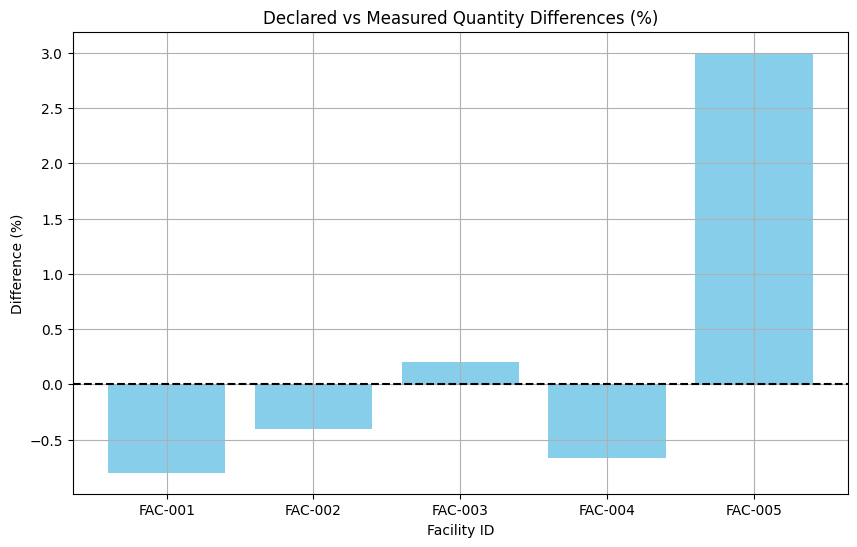


Facility FAC-001 - U-235
  Significant discrepancy detected! Follow-up recommended.

Facility FAC-002 - U-238
  Significant discrepancy detected! Follow-up recommended.

Facility FAC-003 - Pu-239
  Measurements within expected uncertainty.

Facility FAC-004 - U-235
  Significant discrepancy detected! Follow-up recommended.

Facility FAC-005 - Pu-241
  Significant discrepancy detected! Follow-up recommended.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Veri Seti
# Declared vs Measured quantities with measurement uncertainty

data = {
    'Facility_ID': ['FAC-001', 'FAC-002', 'FAC-003', 'FAC-004', 'FAC-005'],
    'Material': ['U-235', 'U-238', 'Pu-239', 'U-235', 'Pu-241'],
    'Declared_Quantity_kg': [100.00, 500.00, 50.00, 75.00, 10.00],
    'Measured_Quantity_kg': [99.20, 498.00, 50.10, 74.50, 10.30],
    'Measurement_Uncertainty_percent': [0.5, 0.2, 1.0, 0.5, 1.5]
}

# DataFrame'e aktar
nuclear_df = pd.DataFrame(data)

# 2. Farklar ve Yüzde Sapmalar
nuclear_df['Difference_kg'] = nuclear_df['Measured_Quantity_kg'] - nuclear_df['Declared_Quantity_kg']
nuclear_df['Difference_percent'] = (nuclear_df['Difference_kg'] / nuclear_df['Declared_Quantity_kg']) * 100

# 3. Belirsizlik limitinin aşılıp aşılmadığı
nuclear_df['Uncertainty_Threshold'] = nuclear_df['Declared_Quantity_kg'] * nuclear_df['Measurement_Uncertainty_percent'] / 100
nuclear_df['Is_Difference_Significant'] = abs(nuclear_df['Difference_kg']) > nuclear_df['Uncertainty_Threshold']

# 4. Sonuç tablosu
print(nuclear_df)

# 5. Basit grafik: Fark yüzdeleri
plt.figure(figsize=(10,6))
plt.bar(nuclear_df['Facility_ID'], nuclear_df['Difference_percent'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Declared vs Measured Quantity Differences (%)')
plt.xlabel('Facility ID')
plt.ylabel('Difference (%)')
plt.grid(True)
plt.show()

# 6. Kısa Rapor
for index, row in nuclear_df.iterrows():
    if row['Is_Difference_Significant']:
        print(f"\nFacility {row['Facility_ID']} - {row['Material']}\n  Significant discrepancy detected! Follow-up recommended.")
    else:
        print(f"\nFacility {row['Facility_ID']} - {row['Material']}\n  Measurements within expected uncertainty.")
